# Credit - https://arminnorouzi.github.io/posts/2023/05/blog-post-13/

'''
GAN is a type of neural network that consists of two networks , a generator and a discriminator.
The Generator tries to creeate new data samples that are similar to the input data , while the discriminator tries to distinguish between real and fake data samples

Transformer used for language translation , text summerization and language modelling - consist of an encoder and decoderthat work together to process input sequence and generate output sequences .  The encoder process the input sequence and prodes a hidden representation of input , the decoder then takes the hidden representation and generates the output seqence

GAN is used for generative tasks , while transformer is used for task related to NLP , GAN generate new samples while transformers tranforms input sequence into output sequence

BENIFITS OF TRANSFORMERS OVER RNN AND LSTM
-------------------------------------------

> Long-Term dependencies
> Parallelization
> Handle variable-length inputs
> Attention-based mechanism

'''

In [5]:
!pip install -q -U tensorflow-text tensorflow
!pip install tensorflow_datasets

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 24.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 1.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 1.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.0 MB/s eta 0:00:000:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21483 sha256=f953cb8d9bd3e7e9a8089548cbb8b1ce0737695c16363ee293b0b0f7116bf701
  Stored in directory: /root/.cache/pip/wheels/54/4e/28/3ed0e1c8a752867445bab994d2340724928aa3ab059c57c8db
Successfully built promise
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3


In [6]:
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
import tensorflow_text


2024-04-29 08:07:08.837716: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 08:07:08.934432: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 08:07:09.028049: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 08:07:10.694982: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
examples,metadata = tfds.load('ted_hrlr_translate/pt_to_en',
                              with_info=True,
                               as_supervised=True)
train_examples,val_examples = examples['train'],examples['validation']

In [10]:
#visualizing Example sentences
for pt_examples,en_examples in train_examples.batch(3).take(1):
    print('> Examples in Portugese:')
    for pt in pt_examples.numpy():
        print(pt.decode('utf-8'))
    print()
    
    print('> Examples in English:')
    for pt in en_examples.numpy():
        print(pt.decode('utf-8'))


> Examples in Portugese:
e quando melhoramos a procura , tiramos a única vantagem da impressão , que é a serendipidade .
mas e se estes fatores fossem ativos ?
mas eles não tinham a curiosidade de me testar .

> Examples in English:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .


2024-04-29 08:12:37.454697: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-29 08:12:37.455973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
# Setting up the tokenizer
model_name = 'ted_hrlr_translate_pt_en_converter'
tf.keras.utils.get_file(
    f'{model_name}.zip',
    f'https://storage.googleapis.com/download.tensorflow.org/models/{model_name}.zip',
    cache_dir='data',cache_subdir='',extract=True
)

184801/184801 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'data/ted_hrlr_translate_pt_en_converter.zip'

In [14]:
tokenizers = tf.saved_model.load(f'data/{model_name}')

In [15]:
#Checking tokenize examples
print('> This is a batch of strings:')
for en in en_examples.numpy():
    print(en.decode('utf-8'))


> This is a batch of strings:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .


In [18]:
encoded = tokenizers.en.tokenize(en_examples)
print('> This is a padded-batch of token IDs:')
for row in encoded.to_list():
    print(row)

> This is a padded-batch of token IDs:
[2, 72, 117, 79, 1259, 1491, 2362, 13, 79, 150, 184, 311, 71, 103, 2308, 74, 2679, 13, 148, 80, 55, 4840, 1434, 2423, 540, 15, 3]
[2, 87, 90, 107, 76, 129, 1852, 30, 3]
[2, 87, 83, 149, 50, 9, 56, 664, 85, 2512, 15, 3]


In [19]:
round_trip = tokenizers.en.detokenize(encoded)
print('> This is human-redable text:')
for line in round_trip.numpy():
    print(line.decode('utf-8'))

> This is human-redable text:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n ' t test for curiosity .


In [20]:
print('> This is the text split into tokens:')
tokens = tokenizers.en.lookup(encoded)
tokens

> This is the text split into tokens:


<tf.RaggedTensor [[b'[START]', b'and', b'when', b'you', b'improve', b'search', b'##ability',
  b',', b'you', b'actually', b'take', b'away', b'the', b'one', b'advantage',
  b'of', b'print', b',', b'which', b'is', b's', b'##ere', b'##nd', b'##ip',
  b'##ity', b'.', b'[END]']                                                 ,
 [b'[START]', b'but', b'what', b'if', b'it', b'were', b'active', b'?',
  b'[END]']                                                           ,
 [b'[START]', b'but', b'they', b'did', b'n', b"'", b't', b'test', b'for',
  b'curiosity', b'.', b'[END]']                                          ]>

In [32]:
lengths = []
for pt_examples,en_examples in train_examples.batch(1024):
    pt_tokens = tokenizers.pt.tokenize(pt_examples)
    lengths.append(pt_tokens.row_lengths())
    
    en_tokens = tokenizers.en.tokenize(en_examples)
    lengths.append(en_tokens.row_lengths())
    print('.',end='',flush=True)
    
all_lengths = np.concatenate(lengths)

...................................................

2024-04-29 09:34:24.213430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


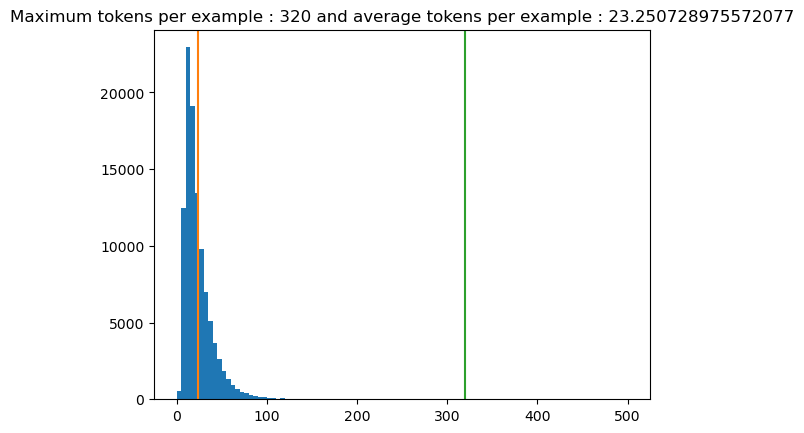

In [34]:
plt.hist(all_lengths,np.linspace(0,500,101))
plt.ylim(plt.ylim())
avg_length = all_lengths.mean()
plt.plot([avg_length,avg_length],plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length,max_length],plt.ylim())
plt.title(f'Maximum tokens per example : {max_length} and average tokens per example : {avg_length}');


In [35]:
#Setting up data Pipeline
MAX_TOKENS=128
def prepare_batch(pt,en):
    """
    Preprocess a batch of porteguse and english sentences for training a machine translation model.
    
    Args:
        pt: A tensor of porteguse sentences of shape (batch_size,) and dtype tf.string
        en: A tensor of english sentences of shape (batch_size,) and dtype tf.string
        
    Returns:
        A tuple of two tensors representing the input and output sequences for the model,and a tensor of shape (batch_size,max_length)
        representing the ground truth out sequences . The input sequence tensor has shape (batch_size,max_length) and dtype tf.int64, 
        and the output sequence has shape (batch_size,max_length) and dtype tf.int64
    """
    
    pt = tokenizers.pt.tokenize(pt)
    pt = pt[:,:MAX_TOKENS]
    pt = pt.to_tensor()
    
    en = tokenizers.en.tokenize(en)
    en = en[:, :(MAX_TOKENS+1)]
    en_inputs = en[:,:-1].to_tensor()
    en_labels = en[:,1:].to_tensor()
    
    return (pt,en_inputs),en_labels

In [36]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [39]:
def make_batches(ds):
    return(
        ds.shuffle(BUFFER_SIZE)
        .batch(BATCH_SIZE)
        .map(prepare_batch,tf.data.AUTOTUNE)
        .prefetch(buffer_size=tf.data.AUTOTUNE))

In [40]:
train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

for (pt,en),en_labels in train_batches.take(1):
    break
    
print(f'pt.shape : {pt.shape}')
print(f'en_labels.shape : {en_labels.shape}')

pt.shape : (64, 77)
en_labels.shape : (64, 87)
